In [1]:
from openai import OpenAI
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import gc
from openai import OpenAIError, RateLimitError

from matplotlib import rcParams
# 한글 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕으로 설정
rcParams['axes.unicode_minus'] = False     # 음수 기호 문제 해결

In [2]:
# APIKEY 정의
api_key = "" # dybaek9_1
client = OpenAI(api_key=api_key)

In [3]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [4]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사
0,02100101.20170901161300001,2017-09-01,매일경제,NaN,[코스닥 공시] 코웰패션 / 유니셈 / MDS테크,경제>부동산,경제>반도체,경제>유통,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[코스닥 공시] 코웰패션 / 유니셈 / MDS테크 코웰패션,유니셈,MDS테크,코웰패...",코스닥 공시 코웰패션 유니셈 MDS테크 코웰패션 유니셈 MDS테크 코웰패션 안정적 ...,코스닥 공시 코웰 패션 유니 셈 MDS 테크 코웰 패션 유니 셈 MDS 테크 코웰 ...,코스닥 공시 코웰패션 유니셈 MDS 테크 코웰패션 유니셈 MDS 테크 코웰패션 안정...,코스닥 공시 코 웨 ㄹ 패션 유니 셈 MDS 테크 코 웨 ㄹ 패션 유니 셈 MDS ...,코스닥 공시 코웰패션 유니 셈 MDS 테크 코웰패션 유니 셈 MDS 테크 코웰패션 ...,코스닥 공시 코웰 패션 유니셈 MDS 테크 코웰 패션 유니셈 MDS 테크 코웰 패션...,코스닥 공시 유니 셈 테크 유니 셈 테크 안정 임대 수익 창출 펜타포트 토지 건물 ...
1,02100101.20170901162741001,2017-09-01,매일경제,김동은,"""함대 가라앉는건 순식간 총수부재 참담""",경제>반도체,NaN,NaN,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"""함대 가라앉는건 순식간 총수부재 참담"" 함대,순식간,함대,총수부재,참담,독일,세계...",함대 가라앉는건 순식간 총수부재 참담 함대 순식간 함대 총수부재 참담 독일 세계가전...,함대 가라앉는건 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 세계...,함대 가라앉는건 순식간 총수부재 참담 함대 순식간 함대 총수부재 참담 독 ㄹ 세계가...,함대 가라앉 는 은 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 ...,함대 가라앉 는 건 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 ...,함대 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 세계 가전 박람...,함대 건 순식간 총수 부재 함대 순식간 함대 총수 부재 독일 세계 가전 박람회 윤 ...
2,02100101.20170901160436001,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...,LG유플러스 천안역사 동아 라이크 텐 홈IoT 플랫폼 구축 LG유플러스 라이크 천안...,LG 유 플러스 천안 역사 동아 라이크 터 ㄴ 홈 IoT 플랫폼 구축 LG 유 플러...,LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...,LG유플러스 천안 역사 동아 라이크 IoT 플랫폼 구축 LG유플러스 라이크 천안 역...,LG유플러스 천안 역사 동아 라이 텐 홈 플랫폼 구축 LG유플러스 라이 천안 역사 ...
3,02100101.20170901084332002,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,Hot-Line 해성 옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성 옵틱스 확대...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,Hot Line 해성옵틱스 듀얼 카메라 확대 수혜 기대 해성옵틱스 확대 듀얼 카메라...,카메라 확대 수혜 기대 확대 카메라 수혜 유진 투자 증권 채택 카메라 수혜 설립 전...
4,02100101.20170901134823001,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...,삼성 갤노트8 100만원 웃돌 듯 고동진 낮추 려 노력 었지만 어렵 삼성 갤노트 1...,삼성 개 ㄹ 노트 8 100 만 원 웃돌 듯 고동진 낮추 려 노력 었 어렵 삼성 개...,삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...,삼성 갤노트8 100 고동진 노력 어렵 삼성 노트 100 고동진 노력 노트 삼성전자...,삼성 노트 만원 고동진 노력 삼성 노트 고동진 노력 노트 삼성전자 갤럭시 노트 가격...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77777,02100601.20240830155007001,2024-08-30,한국경제,한경우,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라",경제>증권_증시,경제>부동산,경제>유통,NaN,NaN,...,https://www.hankyung.com/article/2024083072596,NaN,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라 엔비디아,쇼...",엔비디아 쇼크 서 회복 시도한 코스피 HLB 코스닥 시총 3위 올라 엔비디아 쇼크 ...,엔비디아 쇼크 서 회복 시도 한 코스피 HLB 코스닥 시 총 3 위 올라 엔비디아 ...,엔비디 쇼크 서 회복 시도한 코스피 HLB 코스닥 시총 3위 오르 엔비디아 쇼크 회...,엔 비디아 쇼크 서 회복 시도 ㄴ 코스 피 HLB 코스닥 시 총 3 위 올르 엔 비...,엔비디아 쇼크 서 회복 시도 ㄴ 코스 피 HLB 코스닥 시 총 3 위 오르 엔비디아...,엔비디아 쇼크 회복 시도 코스피 HLB 코스닥 엔비디아 쇼크 회복 시도 코스피 HL...,엔비디아 쇼크 회복 시도 코스 피 코스닥 시 총 위 엔비디아 쇼크 회복 시도 코스 ...
77778,02100601.20240830110414001,2024-08-30,한국경제,한경우,외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방,경제>증권_증시,경제>부동산,경제>산업_기업,NaN,NaN,...,https://www.hankyung.com/article/2024083065006,NaN,"외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방 외국인,매수,코스...",외국인 매수에 코

In [5]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사'],
      dtype='object')

In [6]:
df_bigkinds['제목_키워드_전처리후_Komoran']

0        코스닥 공시 코웰패션 유니 셈 MDS 테크 코웰패션 유니 셈 MDS 테크 코웰패션 ...
1        함대 가라앉 는 건 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 ...
2        LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...
3        Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...
4        삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...
                               ...                        
77777    엔비디아 쇼크 서 회복 시도 ㄴ 코스 피 HLB 코스닥 시 총 3 위 오르 엔비디아...
77778    외국인 매수 코스 피 강세 코스닥 선 바이오 vs 2 차 전지 공방 외국인 매수 코...
77779    코스 피 외국인 매수 강세 삼성전자 SK하이닉스 소폭 반등 코스 피 외국인 매수 강...
77780    DB 글로벌 칩 대표 박찬호 DDI 설계 2 도약 DB 글로벌 대표 박찬호 DDI ...
77781    인텔 파운드리 힘 빼 ㄴ다 인텔 파운드리 실적 부진 구조조정 인텔 파운드리 반도체 ...
Name: 제목_키워드_전처리후_Komoran, Length: 77782, dtype: object

In [8]:
# chatgpt - 원래 소스 대비 10배 빨라지며 50개 샘플링으로 테스트시 sentiments 동일/predicted_texts는 상이할 수 있으나
# 원래 소스도 재실행시 상이
# 개선사항
# 1. 병렬 처리: ThreadPoolExecutor를 사용하여 동시에 여러 요청을 보낼 수 있도록 했습니다. 이렇게 하면 처리 속도가 병목 현상 없이 크게 개선됩니다.
# 2. 딜레이 최적화: RateLimitError가 발생할 때 10초를 기다리는 대신, 1초 대기 후 재시도하도록 수정했습니다. 이렇게 하면 딜레이로 인한 비효율을 줄일 수 있습니다.
# 3. 오류 처리: RateLimitError 외의 예외가 발생할 경우도 안전하게 처리하여 실행이 중단되지 않도록 했습니다.
# 4. 결과 정리: sentiments와 predicted_texts 리스트를 오류 없이 저장할 수 있도록 수정했습니다.

import concurrent.futures
import time
from tqdm import tqdm

def analyze_text_impact(text):
    """
    주어진 텍스트가 삼성전자 주가에 미칠 영향을 분석하는 함수
    """
    prompt = f"""
    이전 지시사항을 모두 잊으세요. 당신은 주식 추천 경험이 있는 금융 전문가라고 가정하세요.
    -1에서 1 사이의 숫자로 응답하세요. -1은 매우 나쁜 소식, 0은 중립적이거나 불확실한 소식, 1은 매우 좋은 소식을 의미합니다. 소수점 한 자리까지 사용할 수 있습니다.
    첫 줄에 숫자로 답하고, 그 다음 줄에 한 문장으로 간결하게 설명하세요.
    이 텍스트는 앞으로 10일 동안에 삼성전자의 주가에 어떤 영향을 미칠까요?
    텍스트: {text}
    """
    model = "gpt-4o-mini"
    messages = [
        {"role": "user", "content": prompt}
    ]
    while True:
        try:
            # API 호출
            response = client.chat.completions.create(
                model=model,        
                messages=messages,    
                max_tokens=50,        
                temperature=0        
            )
            result = response.choices[0].message.content
            sentiment, predicted_text = result.split('\n', 1)
            return float(sentiment.strip()), predicted_text.strip()  # 값 정리
        except RateLimitError as e:
            print(f"Rate limit reached: {e}. Retrying in 1 second...")
            time.sleep(1)  # 대기 시간을 1초로 줄임
        except Exception as e:
            print(f"An error occurred: {e}")
            return None, None  # 오류 처리

# 텍스트 분석을 병렬로 처리
def analyze_texts_in_parallel(text_list):
    results = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(tqdm(executor.map(analyze_text_impact, text_list), total=len(text_list)))
    return results

# 분석할 텍스트 리스트
text_list = df_bigkinds['제목_키워드_전처리후_Komoran'].tolist()

# 병렬 처리를 통한 결과 분석
results = analyze_texts_in_parallel(text_list)

# 결과 저장
sentiments = [result[0] for result in results if result[0] is not None]
predicted_texts = [result[1] for result in results if result[1] is not None]

100%|██████████████████████████████████████████████████████████████████████████| 77782/77782 [1:19:01<00:00, 16.41it/s]


In [19]:
# 결과를 데이터프레임에 추가
df_bigkinds['GPT_Sentiment'] = sentiments
df_bigkinds['Predicted_Text'] = predicted_texts

In [21]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,제목_키워드,제목_키워드_전처리후,제목_키워드_전처리후_Okt,제목_키워드_전처리후_Hannanum,제목_키워드_전처리후_Kkma,제목_키워드_전처리후_Komoran,제목_키워드_전처리후_kiwi,제목_키워드_전처리후_Komoran_명사,GPT_Sentiment,Predicted_Text
0,02100101.20170901161300001,2017-09-01,매일경제,NaN,[코스닥 공시] 코웰패션 / 유니셈 / MDS테크,경제>부동산,경제>반도체,경제>유통,NaN,NaN,...,"[코스닥 공시] 코웰패션 / 유니셈 / MDS테크 코웰패션,유니셈,MDS테크,코웰패...",코스닥 공시 코웰패션 유니셈 MDS테크 코웰패션 유니셈 MDS테크 코웰패션 안정적 ...,코스닥 공시 코웰 패션 유니 셈 MDS 테크 코웰 패션 유니 셈 MDS 테크 코웰 ...,코스닥 공시 코웰패션 유니셈 MDS 테크 코웰패션 유니셈 MDS 테크 코웰패션 안정...,코스닥 공시 코 웨 ㄹ 패션 유니 셈 MDS 테크 코 웨 ㄹ 패션 유니 셈 MDS ...,코스닥 공시 코웰패션 유니 셈 MDS 테크 코웰패션 유니 셈 MDS 테크 코웰패션 ...,코스닥 공시 코웰 패션 유니셈 MDS 테크 코웰 패션 유니셈 MDS 테크 코웰 패션...,코스닥 공시 유니 셈 테크 유니 셈 테크 안정 임대 수익 창출 펜타포트 토지 건물 ...,0.5,삼성전자가 유니셈과의 반도체 장비 공급 계약 체결로 긍정적인 매출 증가가 예상되지만...
1,02100101.20170901162741001,2017-09-01,매일경제,김동은,"""함대 가라앉는건 순식간 총수부재 참담""",경제>반도체,NaN,NaN,NaN,NaN,...,"""함대 가라앉는건 순식간 총수부재 참담"" 함대,순식간,함대,총수부재,참담,독일,세계...",함대 가라앉는건 순식간 총수부재 참담 함대 순식간 함대 총수부재 참담 독일 세계가전...,함대 가라앉는건 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 세계...,함대 가라앉는건 순식간 총수부재 참담 함대 순식간 함대 총수부재 참담 독 ㄹ 세계가...,함대 가라앉 는 은 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 ...,함대 가라앉 는 건 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 ...,함대 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 세계 가전 박람...,함대 건 순식간 총수 부재 함대 순식간 함대 총수 부재 독일 세계 가전 박람회 윤 ...,-1.0,삼성전자의 경영진 부재와 불확실한 미래 전략은 투자자들에게 큰 불안감을 초래할 것이...
2,02100101.20170901160436001,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG유플러스 천안역사 동아 라이크 텐 에 홈IoT 플랫폼 구축 LG유플러스 라이크 ...,LG 유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG 유플러스 라...,LG유플러스 천안역사 동아 라이크 텐 홈IoT 플랫폼 구축 LG유플러스 라이크 천안...,LG 유 플러스 천안 역사 동아 라이크 터 ㄴ 홈 IoT 플랫폼 구축 LG 유 플러...,LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...,LG유플러스 천안 역사 동아 라이크 IoT 플랫폼 구축 LG유플러스 라이크 천안 역...,LG유플러스 천안 역사 동아 라이 텐 홈 플랫폼 구축 LG유플러스 라이 천안 역사 ...,0.5,"이 텍스트는 LG유플러스의 IoT 플랫폼 구축 소식으로, 삼성전자의 IoT 가전 기..."
3,02100101.20170901084332002,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot-Line 해성옵틱스 듀얼 카메라 확대에 따른 수혜 기대 해성옵틱스 확대 듀얼...,Hot - Line 해성 옵 틱 스 듀얼 카메라 확대 따른 수혜 기대 해성 옵 틱 ...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,Hot-Line 해성 옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성 옵틱스 확대...,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,Hot Line 해성옵틱스 듀얼 카메라 확대 수혜 기대 해성옵틱스 확대 듀얼 카메라...,카메라 확대 수혜 기대 확대 카메라 수혜 유진 투자 증권 채택 카메라 수혜 설립 전...,1.0,해성옵틱스의 듀얼 카메라 확대와 삼성전자의 갤럭시 노트 채택 가능성은 긍정적인 수혜...
4,02100101.20170901134823001,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 갤노트8 100만원 웃돌듯 고동진 낮추려 노력했지만 어려워 삼성 갤노트 100...,삼성 갤 노트 8 100만원 웃 돌듯 고동진 낮추려 노력 했지만 어려워 삼성 갤 노...,삼성 갤노트8 100만원 웃돌 듯 고동진 낮추 려 노력 었지만 어렵 삼성 갤노트 1...,삼성 개 ㄹ 노트 8 100 만 원 웃돌 듯 고동진 낮추 려 노력 었 어렵 삼성 개...,삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...,삼성 갤노트8 100 고동진 노력 어렵 삼성 노트 100 고동진 노력 노트 삼성전자...,삼성 노트 만원 고동진 노력 삼성 노트 고동진 노력 노트 삼성전자 갤럭시 노트 가격...,0.5,"삼성전자의 갤럭시 노트 8 가격이 100만 원을 웃돌 것으로 예상되지만, 소비자 기..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77777,02100601.20240830155007001,2024-08-30,한국경제,한경우,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라",경제>증권_증시,경제>부동산,경제>유통,NaN,NaN,...,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라 엔비디아,쇼...",엔비디아 쇼크 서 회복 시도한 코스피 HLB 코스닥 시총 3위 올라 엔비디아 쇼크 ...,엔비디아 쇼크 서 회복 시도 한 코스피 HLB 코스닥 시 총 3 위 올라 엔비디아 ...,엔비디 쇼크 서 회복 시도한 코스피 HLB 코스닥 시총 3위 오르 엔비디아 쇼크 회...,엔 비디아 쇼크 서 회복 시도 ㄴ 코스 피 HLB 코스닥 시 총 3 위 올르 엔 비...,엔비디아 쇼크 서 회복 시도 ㄴ 코스 피 HLB 코스닥 시 총 3 위 오르 엔비디아...,엔비디아 쇼크 회복 시도 코스피 HLB 코스닥 엔비디아 쇼크 회복 시도 코스피 HL...,엔비디아 쇼크 회복 시도 코스 피 코스닥 시 총 위 엔비디아 쇼크 회복 시도 코스 ...,0.5,"현재 엔비디아의 실적 회복 시도가 긍정적인 신호를 주고 있지만, 외국인 매도세와 혼..."
77778,02100601.20240830110414001,2024-08-30,한국경제,한경우,외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방,경제>증권_증시,경제>부동산,경제>산업_기업,NaN,NaN,...,"외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방 외국인,매수,코스...",외국인 매수에 코스피 강세 코스닥선 바이오 vs 2차전지 공

In [23]:
df_bigkinds.columns

Index(['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
       '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후',
       '제목_키워드_전처리후_Okt', '제목_키워드_전처리후_Hannanum', '제목_키워드_전처리후_Kkma',
       '제목_키워드_전처리후_Komoran', '제목_키워드_전처리후_kiwi', '제목_키워드_전처리후_Komoran_명사',
       'GPT_Sentiment', 'Predicted_Text'],
      dtype='object')

In [25]:
# 원하는 열만 선택하여 새로운 데이터프레임 생성
df_bigkinds = df_bigkinds[['뉴스 식별자', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2','통합 분류3',
                           '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드',
                           '특성추출(가중치순 상위 50개)', '본문', 'URL', '분석제외 여부', '제목_키워드', '제목_키워드_전처리후_Komoran',
                           'GPT_Sentiment', 'Predicted_Text']]

In [27]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Komoran,GPT_Sentiment,Predicted_Text
0,02100101.20170901161300001,2017-09-01,매일경제,NaN,[코스닥 공시] 코웰패션 / 유니셈 / MDS테크,경제>부동산,경제>반도체,경제>유통,NaN,NaN,...,"코웰패션,유니셈,MDS테크,삼성전자,한컴MDS","코웰패션,유니셈,MDS테크,코웰패션,안정적,임대,수익,창출,펜타포트,토지,건물,양수...","유니셈,매출액,코웰패션,한컴,mds,경영목적,펜타포트,삼성전자,55억,반도체,mds...",◇코웰패션=안정적 임대수익 창출을 위해 펜타포트 토지 및 건물 500억원에 양수 결...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[코스닥 공시] 코웰패션 / 유니셈 / MDS테크 코웰패션,유니셈,MDS테크,코웰패...",코스닥 공시 코웰패션 유니 셈 MDS 테크 코웰패션 유니 셈 MDS 테크 코웰패션 ...,0.5,삼성전자가 유니셈과의 반도체 장비 공급 계약 체결로 긍정적인 매출 증가가 예상되지만...
1,02100101.20170901162741001,2017-09-01,매일경제,김동은,"""함대 가라앉는건 순식간 총수부재 참담""",경제>반도체,NaN,NaN,NaN,NaN,...,"최고경영진,경영위원회","함대,순식간,함대,총수부재,참담,독일,세계가전,박람회,IFA,윤부근,삼성전자,대표,...","삼성전자,부회장,참담,사업구조,독일,간담회,윤부근,순식간,부재중,선단장,유럽,베를린...",◆ 독일 세계가전박람회(IFA 2017) / 윤부근 삼성전자 대표 심경토로 ◆ \n...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"""함대 가라앉는건 순식간 총수부재 참담"" 함대,순식간,함대,총수부재,참담,독일,세계...",함대 가라앉 는 건 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 ...,-1.0,삼성전자의 경영진 부재와 불확실한 미래 전략은 투자자들에게 큰 불안감을 초래할 것이...
2,02100101.20170901160436001,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,"천안역사,애플,동아건설산업,LG유플러스,LG전자,삼성전자,IoT","LG유플러스,라이크,천안역사,동아,라이크,구축,플랫폼,LG유플러스,동아건설산업,건설...","iot,유플러스,라이크,천안역사,스마트폰,만큼,류창수,lg유플러스,lg,천안역,네트...",LG유플러스는 동아건설산업이 건설 공급하는 48층 규모의 초고층 주상복합아파트 '천...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...,0.5,"이 텍스트는 LG유플러스의 IoT 플랫폼 구축 소식으로, 삼성전자의 IoT 가전 기..."
3,02100101.20170901084332002,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,"유진투자증권,삼성전자,해성옵틱스,코스닥","해성옵틱스,확대,듀얼,카메라,수혜,유진투자증권,해성옵틱스,채택,듀얼,카메라,수혜,설...","해성옵틱스,삼성전자,중국향,전문제조업체,스마트폰,기대감,코스닥,상승세,박종선,연구원...",유진투자증권은 1일 해성옵틱스에 대해 듀얼 카메라 채택이 많아지기에 수혜를 기대한다...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,1.0,해성옵틱스의 듀얼 카메라 확대와 삼성전자의 갤럭시 노트 채택 가능성은 긍정적인 수혜...
4,02100101.20170901134823001,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,NaN,"삼성,갤노트,100만,고동진,노력,노트8,삼성전자,갤럭시,노트,가격,출시,100만,...","100만,갤럭시,삼성전자,출고가,독일,미국,고동진,영국,부담감,스마트폰,노트8,ol...",삼성전자 '갤럭시 노트8'의 국내 출시 가격이 100만원을 넘을 전망이다. 갤럭시S...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...,0.5,"삼성전자의 갤럭시 노트 8 가격이 100만 원을 웃돌 것으로 예상되지만, 소비자 기..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77777,02100601.20240830155007001,2024-08-30,한국경제,한경우,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라",경제>증권_증시,경제>부동산,경제>유통,NaN,NaN,...,"POSCO홀딩스,삼성물산,기아,알테오젠,클래시스,삼성전자,엔비디아,코스피,SK하이닉...","엔비디아,쇼크,회복,시도,코스피,HLB,3위,코스닥,시총,코스피,기관,매수,상승헀,...","원어치,코스닥,시총,외국인,코스피,밸류업,순매도,매수세,현물주식,상승폭,3위,엔비디...",코스피가 기관 매수에 힙입어 상승헀다. 다만 엔비디아의 2분기 실적에 대한 주식시장...,https://www.hankyung.com/article/2024083072596,NaN,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라 엔비디아,쇼...",엔비디아 쇼크 서 회복 시도 ㄴ 코스 피 HLB 코스닥 시 총 3 위 오르 엔비디아...,0.5,"현재 엔비디아의 실적 회복 시도가 긍정적인 신호를 주고 있지만, 외국인 매도세와 혼..."
77778,02100601.20240830110414001,2024-08-30,한국경제,한경우,외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방,경제>증권_증시,경제>부동산,경제>산업_기업,NaN,NaN,...,"POSCO홀딩스,기아,엔비디아발,엔켐,알테오젠,에코프로보,클래시스,리노공업,삼성전자...","외국인,매수,코스피,강세,코스닥선,2차,바이오,vs,전지,공방,코스피,매수,외국인,...","코스닥,원어치,외국인,2차,코스피,알테오젠,대장주,현물주식,에코프로,3위,에코프로비...",코스피가 외국인 선물 매수에 힘입어 강세를 보이고 있다. 지난 29일의 엔비디아발(...,https://www.hankyung.com/article/2024083065006,NaN,"외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방 외국인,매수,코스...",외국인 매수 코스 피 강세 코스닥 선 바이오 vs 2 차 전지 공방 외국인 매수 코...,0.5,현재 외국인 매수세가 강하고 일부 주식이 상승세를 보이고 있어 삼성전자의 주가에 긍...
77779,02100601.20240830092005001,2024-08-30,한국경제,한경우,"코스피, 외국인 매수에 강세 삼성전자 SK하이닉스 소폭 반등",경제>증권_증시,경제>산업_기업,경제>부동산,NaN,NaN,...,"기아,엔켐,

In [29]:
df_bigkinds.to_excel('./Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후_Komoran_chatgpt.xlsx', index=False)

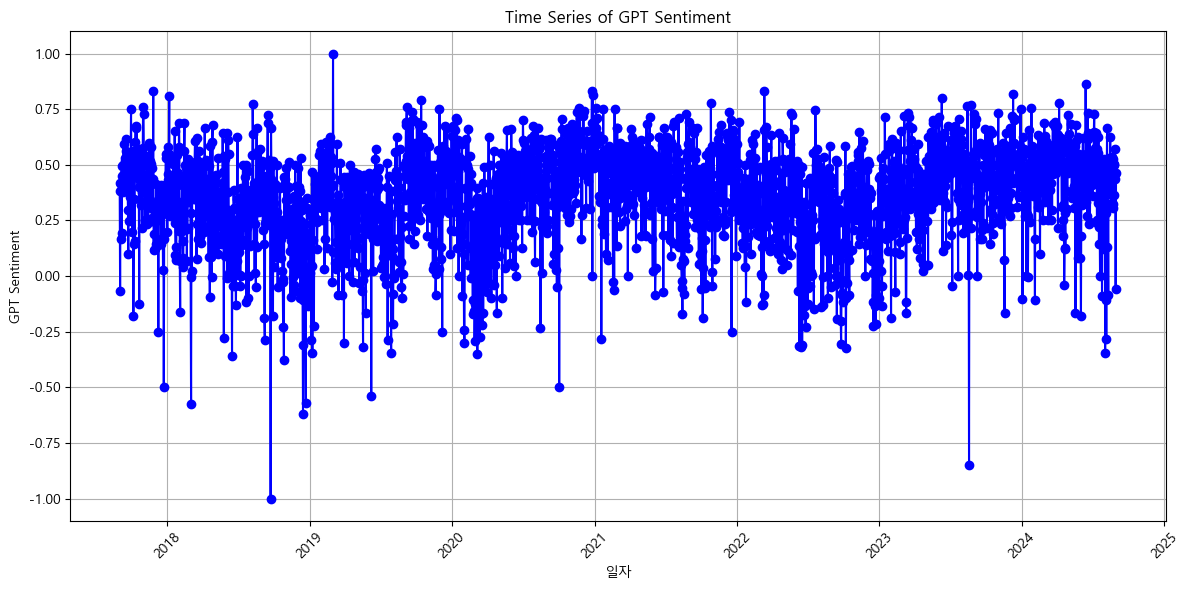

In [30]:
# 'Date' 열을 datetime 타입으로 변환
df_bigkinds.loc[:, '일자'] = pd.to_datetime(df_bigkinds['일자'])

# 날짜별로 'GPT_Sentiment'의 평균을 계산
df_bigkinds_grouped = df_bigkinds.groupby('일자')['GPT_Sentiment'].mean().reset_index()

# 그래프 시각화
plt.figure(figsize=(12, 6))
plt.plot(df_bigkinds_grouped['일자'], df_bigkinds_grouped['GPT_Sentiment'], marker='o', linestyle='-', color='b')
plt.title('Time Series of GPT Sentiment')
plt.xlabel('일자')
plt.ylabel('GPT Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

In [31]:
df_bigkinds_avg = df_bigkinds.groupby('일자', as_index=False)['GPT_Sentiment'].mean()

# 결과 확인
df_bigkinds_avg

,일자,GPT_Sentiment
0,2017-09-01,0.383333
1,2017-09-02,-0.066667
2,2017-09-03,0.416667
3,2017-09-04,0.167500
4,2017-09-05,0.411765
...,...,...
2551,2024-08-26,0.364516
2552,2024-08-27,0.572414
2553,2024-08-28,0.435000
2554,2024-08-29,-0.057895


In [32]:
# 감정 분석 결과 저장(일자별)
df_bigkinds_avg.to_excel('./Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후_Komoran_chatgpt_daily.xlsx', index=False)

chatgpt의 경우 다시 평가하는 경우 비용발생하여 기존에 평가 데이터를 필터링하여 정상 데이터만 추출

In [3]:
# EXCEL파일 읽기
file_path = './Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후_Komoran_chatgpt.xlsx'
df_bigkinds = pd.read_excel(file_path, converters={'뉴스 식별자': str})  # '뉴스 식별자'는 해당 열의 실제 이름으로 대체

In [4]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Komoran,GPT_Sentiment,Predicted_Text
0,02100101.20170901161300001,2017-09-01,매일경제,NaN,[코스닥 공시] 코웰패션 / 유니셈 / MDS테크,경제>부동산,경제>반도체,경제>유통,NaN,NaN,...,"코웰패션,유니셈,MDS테크,삼성전자,한컴MDS","코웰패션,유니셈,MDS테크,코웰패션,안정적,임대,수익,창출,펜타포트,토지,건물,양수...","유니셈,매출액,코웰패션,한컴,mds,경영목적,펜타포트,삼성전자,55억,반도체,mds...",◇코웰패션=안정적 임대수익 창출을 위해 펜타포트 토지 및 건물 500억원에 양수 결...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[코스닥 공시] 코웰패션 / 유니셈 / MDS테크 코웰패션,유니셈,MDS테크,코웰패...",코스닥 공시 코웰패션 유니 셈 MDS 테크 코웰패션 유니 셈 MDS 테크 코웰패션 ...,0.5,삼성전자가 유니셈과의 반도체 장비 공급 계약 체결로 긍정적인 매출 증가가 예상되지만...
1,02100101.20170901162741001,2017-09-01,매일경제,김동은,"""함대 가라앉는건 순식간 총수부재 참담""",경제>반도체,NaN,NaN,NaN,NaN,...,"최고경영진,경영위원회","함대,순식간,함대,총수부재,참담,독일,세계가전,박람회,IFA,윤부근,삼성전자,대표,...","삼성전자,부회장,참담,사업구조,독일,간담회,윤부근,순식간,부재중,선단장,유럽,베를린...",◆ 독일 세계가전박람회(IFA 2017) / 윤부근 삼성전자 대표 심경토로 ◆ \n...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"""함대 가라앉는건 순식간 총수부재 참담"" 함대,순식간,함대,총수부재,참담,독일,세계...",함대 가라앉 는 건 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 ...,-1.0,삼성전자의 경영진 부재와 불확실한 미래 전략은 투자자들에게 큰 불안감을 초래할 것이...
2,02100101.20170901160436001,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,"천안역사,애플,동아건설산업,LG유플러스,LG전자,삼성전자,IoT","LG유플러스,라이크,천안역사,동아,라이크,구축,플랫폼,LG유플러스,동아건설산업,건설...","iot,유플러스,라이크,천안역사,스마트폰,만큼,류창수,lg유플러스,lg,천안역,네트...",LG유플러스는 동아건설산업이 건설 공급하는 48층 규모의 초고층 주상복합아파트 '천...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...,0.5,"이 텍스트는 LG유플러스의 IoT 플랫폼 구축 소식으로, 삼성전자의 IoT 가전 기..."
3,02100101.20170901084332002,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,"유진투자증권,삼성전자,해성옵틱스,코스닥","해성옵틱스,확대,듀얼,카메라,수혜,유진투자증권,해성옵틱스,채택,듀얼,카메라,수혜,설...","해성옵틱스,삼성전자,중국향,전문제조업체,스마트폰,기대감,코스닥,상승세,박종선,연구원...",유진투자증권은 1일 해성옵틱스에 대해 듀얼 카메라 채택이 많아지기에 수혜를 기대한다...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,1.0,해성옵틱스의 듀얼 카메라 확대와 삼성전자의 갤럭시 노트 채택 가능성은 긍정적인 수혜...
4,02100101.20170901134823001,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,NaN,"삼성,갤노트,100만,고동진,노력,노트8,삼성전자,갤럭시,노트,가격,출시,100만,...","100만,갤럭시,삼성전자,출고가,독일,미국,고동진,영국,부담감,스마트폰,노트8,ol...",삼성전자 '갤럭시 노트8'의 국내 출시 가격이 100만원을 넘을 전망이다. 갤럭시S...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...,0.5,"삼성전자의 갤럭시 노트 8 가격이 100만 원을 웃돌 것으로 예상되지만, 소비자 기..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77777,02100601.20240830155007001,2024-08-30,한국경제,한경우,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라",경제>증권_증시,경제>부동산,경제>유통,NaN,NaN,...,"POSCO홀딩스,삼성물산,기아,알테오젠,클래시스,삼성전자,엔비디아,코스피,SK하이닉...","엔비디아,쇼크,회복,시도,코스피,HLB,3위,코스닥,시총,코스피,기관,매수,상승헀,...","원어치,코스닥,시총,외국인,코스피,밸류업,순매도,매수세,현물주식,상승폭,3위,엔비디...",코스피가 기관 매수에 힙입어 상승헀다. 다만 엔비디아의 2분기 실적에 대한 주식시장...,https://www.hankyung.com/article/2024083072596,NaN,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라 엔비디아,쇼...",엔비디아 쇼크 서 회복 시도 ㄴ 코스 피 HLB 코스닥 시 총 3 위 오르 엔비디아...,0.5,"현재 엔비디아의 실적 회복 시도가 긍정적인 신호를 주고 있지만, 외국인 매도세와 혼..."
77778,02100601.20240830110414001,2024-08-30,한국경제,한경우,외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방,경제>증권_증시,경제>부동산,경제>산업_기업,NaN,NaN,...,"POSCO홀딩스,기아,엔비디아발,엔켐,알테오젠,에코프로보,클래시스,리노공업,삼성전자...","외국인,매수,코스피,강세,코스닥선,2차,바이오,vs,전지,공방,코스피,매수,외국인,...","코스닥,원어치,외국인,2차,코스피,알테오젠,대장주,현물주식,에코프로,3위,에코프로비...",코스피가 외국인 선물 매수에 힘입어 강세를 보이고 있다. 지난 29일의 엔비디아발(...,https://www.hankyung.com/article/2024083065006,NaN,"외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방 외국인,매수,코스...",외국인 매수 코스 피 강세 코스닥 선 바이오 vs 2 차 전지 공방 외국인 매수 코...,0.5,현재 외국인 매수세가 강하고 일부 주식이 상승세를 보이고 있어 삼성전자의 주가에 긍...
77779,02100601.20240830092005001,2024-08-30,한국경제,한경우,"코스피, 외국인 매수에 강세 삼성전자 SK하이닉스 소폭 반등",경제>증권_증시,경제>산업_기업,경제>부동산,NaN,NaN,...,"기아,엔켐,

In [5]:
# 뉴스 식별자 컬럼에서 '.' 이후의 값만 조회
df_bigkinds['뉴스 식별자'] = df_bigkinds['뉴스 식별자'].str.split('.').str[1]

분석제외 대상과 중복건 제거

In [7]:
df_bigkinds = df_bigkinds[df_bigkinds['분석제외 여부'].isnull()]

In [8]:
df_bigkinds

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,...,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,제목_키워드,제목_키워드_전처리후_Komoran,GPT_Sentiment,Predicted_Text
0,20170901161300001,2017-09-01,매일경제,NaN,[코스닥 공시] 코웰패션 / 유니셈 / MDS테크,경제>부동산,경제>반도체,경제>유통,NaN,NaN,...,"코웰패션,유니셈,MDS테크,삼성전자,한컴MDS","코웰패션,유니셈,MDS테크,코웰패션,안정적,임대,수익,창출,펜타포트,토지,건물,양수...","유니셈,매출액,코웰패션,한컴,mds,경영목적,펜타포트,삼성전자,55억,반도체,mds...",◇코웰패션=안정적 임대수익 창출을 위해 펜타포트 토지 및 건물 500억원에 양수 결...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[코스닥 공시] 코웰패션 / 유니셈 / MDS테크 코웰패션,유니셈,MDS테크,코웰패...",코스닥 공시 코웰패션 유니 셈 MDS 테크 코웰패션 유니 셈 MDS 테크 코웰패션 ...,0.5,삼성전자가 유니셈과의 반도체 장비 공급 계약 체결로 긍정적인 매출 증가가 예상되지만...
1,20170901162741001,2017-09-01,매일경제,김동은,"""함대 가라앉는건 순식간 총수부재 참담""",경제>반도체,NaN,NaN,NaN,NaN,...,"최고경영진,경영위원회","함대,순식간,함대,총수부재,참담,독일,세계가전,박람회,IFA,윤부근,삼성전자,대표,...","삼성전자,부회장,참담,사업구조,독일,간담회,윤부근,순식간,부재중,선단장,유럽,베를린...",◆ 독일 세계가전박람회(IFA 2017) / 윤부근 삼성전자 대표 심경토로 ◆ \n...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"""함대 가라앉는건 순식간 총수부재 참담"" 함대,순식간,함대,총수부재,참담,독일,세계...",함대 가라앉 는 건 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 ...,-1.0,삼성전자의 경영진 부재와 불확실한 미래 전략은 투자자들에게 큰 불안감을 초래할 것이...
2,20170901160436001,2017-09-01,매일경제,박진형,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축",IT_과학>모바일,경제>부동산,경제>유통,NaN,NaN,...,"천안역사,애플,동아건설산업,LG유플러스,LG전자,삼성전자,IoT","LG유플러스,라이크,천안역사,동아,라이크,구축,플랫폼,LG유플러스,동아건설산업,건설...","iot,유플러스,라이크,천안역사,스마트폰,만큼,류창수,lg유플러스,lg,천안역,네트...",LG유플러스는 동아건설산업이 건설 공급하는 48층 규모의 초고층 주상복합아파트 '천...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"LG유플러스, `천안역사 동아 라이크 텐`에 홈IoT 플랫폼 구축 LG유플러스,라이...",LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...,0.5,"이 텍스트는 LG유플러스의 IoT 플랫폼 구축 소식으로, 삼성전자의 IoT 가전 기..."
3,20170901084332002,2017-09-01,매일경제,박진형,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대""",경제>증권_증시,IT_과학>모바일,NaN,NaN,NaN,...,"유진투자증권,삼성전자,해성옵틱스,코스닥","해성옵틱스,확대,듀얼,카메라,수혜,유진투자증권,해성옵틱스,채택,듀얼,카메라,수혜,설...","해성옵틱스,삼성전자,중국향,전문제조업체,스마트폰,기대감,코스닥,상승세,박종선,연구원...",유진투자증권은 1일 해성옵틱스에 대해 듀얼 카메라 채택이 많아지기에 수혜를 기대한다...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"[Hot-Line] ""해성옵틱스, 듀얼 카메라 확대에 따른 수혜 기대"" 해성옵틱스,...",Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,1.0,해성옵틱스의 듀얼 카메라 확대와 삼성전자의 갤럭시 노트 채택 가능성은 긍정적인 수혜...
4,20170901134823001,2017-09-01,매일경제,박진형,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워""",IT_과학>모바일,경제>산업_기업,경제>유통,NaN,NaN,...,NaN,"삼성,갤노트,100만,고동진,노력,노트8,삼성전자,갤럭시,노트,가격,출시,100만,...","100만,갤럭시,삼성전자,출고가,독일,미국,고동진,영국,부담감,스마트폰,노트8,ol...",삼성전자 '갤럭시 노트8'의 국내 출시 가격이 100만원을 넘을 전망이다. 갤럭시S...,http://news.mk.co.kr/newsRead.php?year=2017&no...,NaN,"삼성 `갤노트8` 100만원 웃돌듯 고동진 ""낮추려 노력했지만 어려워"" 삼성,갤노트...",삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...,0.5,"삼성전자의 갤럭시 노트 8 가격이 100만 원을 웃돌 것으로 예상되지만, 소비자 기..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77777,20240830155007001,2024-08-30,한국경제,한경우,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라",경제>증권_증시,경제>부동산,경제>유통,NaN,NaN,...,"POSCO홀딩스,삼성물산,기아,알테오젠,클래시스,삼성전자,엔비디아,코스피,SK하이닉...","엔비디아,쇼크,회복,시도,코스피,HLB,3위,코스닥,시총,코스피,기관,매수,상승헀,...","원어치,코스닥,시총,외국인,코스피,밸류업,순매도,매수세,현물주식,상승폭,3위,엔비디...",코스피가 기관 매수에 힙입어 상승헀다. 다만 엔비디아의 2분기 실적에 대한 주식시장...,https://www.hankyung.com/article/2024083072596,NaN,"'엔비디아 쇼크'서 회복 시도한 코스피 HLB, 코스닥 시총 3위 올라 엔비디아,쇼...",엔비디아 쇼크 서 회복 시도 ㄴ 코스 피 HLB 코스닥 시 총 3 위 오르 엔비디아...,0.5,"현재 엔비디아의 실적 회복 시도가 긍정적인 신호를 주고 있지만, 외국인 매도세와 혼..."
77778,20240830110414001,2024-08-30,한국경제,한경우,외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방,경제>증권_증시,경제>부동산,경제>산업_기업,NaN,NaN,...,"POSCO홀딩스,기아,엔비디아발,엔켐,알테오젠,에코프로보,클래시스,리노공업,삼성전자...","외국인,매수,코스피,강세,코스닥선,2차,바이오,vs,전지,공방,코스피,매수,외국인,...","코스닥,원어치,외국인,2차,코스피,알테오젠,대장주,현물주식,에코프로,3위,에코프로비...",코스피가 외국인 선물 매수에 힘입어 강세를 보이고 있다. 지난 29일의 엔비디아발(...,https://www.hankyung.com/article/2024083065006,NaN,"외국인 매수에 코스피 강세 코스닥선 '바이오 vs 2차전지' 공방 외국인,매수,코스...",외국인 매수 코스 피 강세 코스닥 선 바이오 vs 2 차 전지 공방 외국인 매수 코...,0.5,현재 외국인 매수세가 강하고 일부 주식이 상승세를 보이고 있어 삼성전자의 주가에 긍...
77779,20240830092005001,2024-08-30,한국경제,한경우,"코스피, 외국인 매수에 강세 삼성전자 SK하이닉스 소폭 반등",경제>증권_증시,경제>산업_기업,경제>부동산,NaN,NaN,...,"기아,엔켐,스탠더드앤드푸어스,다우존스,삼성전자,유가증권,POSCO,에코프로,SK하이...","코스피,외국인,매수,강세,삼성전자,SK하이닉스,

뉴스 식별자 최소값 기준으로 제목_키워드_전처리후 그룹핑

In [10]:
# 그룹핑할 컬럼 리스트
group_columns = ['제목_키워드_전처리후_Komoran']

# 각 그룹에서 뉴스 식별자 컬럼의 최소값을 유지
df_bigkinds2 = df_bigkinds.groupby(group_columns, as_index=False).agg({'뉴스 식별자': 'min'})

In [11]:
df_bigkinds2

,제목_키워드_전처리후_Komoran,뉴스 식별자
0,+ The View 사회 책임 투자 는 장기 수익 유리 지배 구조 가장 눈여겨보 사...,20171015091312001
1,+ 김 대리 배당 투자 연말 보너스 챙기 ㄴ다 김 대리 배당 투자 연말 보너스 시대...,20171109072410001
2,+ 내우외환 코스 피 절세 대세 다 내우외환 코스 피 절세 대세 다 북 핵 사드 여...,20170906100126001
3,+ 더 뷰 경제 최악 아냐 경기 의존도 높 지 않 은 기업 찾 아라 의존 경제 최악...,20190116181438001
4,+ 롤러코스터 장세 돈 흐름 잡 아라 롤러코스터 장세 흐름 해소 지정학 리스크 냉랭...,20180513090025001
...,...,...
71105,힘들 어도 좋아하 는 마음 버티 위스키 장인 꿈 마음 위스키 장인 김창수 김창수 위...,20230517080103001
71106,힘세 지 ㄴ 개미 거래 대금 70 % 차지 테마주 대신 우량주 담 았 다 개미 차지...,20201213173745001
71107,힘세 지 ㄴ 소액 주주 기업 배당 팍팍 늘리 ㄴ다 소액 주주 기업 배당 새해 상 장...,20220210172007001
71108,힘찬 건설 삼성 LG 배후 수요 탄탄 고덕 헤리움 시 니어 8월 분양 건설 삼성 L...,20200727120638001


In [12]:
# 필요한 컬럼만 선택하여 두 데이터프레임 병합
big_kinds_sentiment = pd.merge(
    df_bigkinds[['제목_키워드_전처리후_Komoran', '뉴스 식별자','일자','GPT_Sentiment','Predicted_Text']],
    df_bigkinds2[['제목_키워드_전처리후_Komoran', '뉴스 식별자']],
    on=['제목_키워드_전처리후_Komoran', '뉴스 식별자'],
    how='inner'
)

big_kinds_sentiment = big_kinds_sentiment[['뉴스 식별자', '일자', '제목_키워드_전처리후_Komoran', 'GPT_Sentiment', 'Predicted_Text']]
big_kinds_sentiment

,뉴스 식별자,일자,제목_키워드_전처리후_Komoran,GPT_Sentiment,Predicted_Text
0,20170901161300001,2017-09-01,코스닥 공시 코웰패션 유니 셈 MDS 테크 코웰패션 유니 셈 MDS 테크 코웰패션 ...,0.5,삼성전자가 유니셈과의 반도체 장비 공급 계약 체결로 긍정적인 매출 증가가 예상되지만...
1,20170901162741001,2017-09-01,함대 가라앉 는 건 순식간 총수 부재 참담 함대 순식간 함대 총수 부재 참담 독일 ...,-1.0,삼성전자의 경영진 부재와 불확실한 미래 전략은 투자자들에게 큰 불안감을 초래할 것이...
2,20170901160436001,2017-09-01,LG유플러스 천안 역사 동아 라이 크 텐 홈 IoT 플랫폼 구축 LG유플러스 라이 ...,0.5,"이 텍스트는 LG유플러스의 IoT 플랫폼 구축 소식으로, 삼성전자의 IoT 가전 기..."
3,20170901084332002,2017-09-01,Hot - Line 해성옵틱스 듀얼 카메라 확대 따르 ㄴ 수혜 기대 해성옵틱스 확대...,1.0,해성옵틱스의 듀얼 카메라 확대와 삼성전자의 갤럭시 노트 채택 가능성은 긍정적인 수혜...
4,20170901134823001,2017-09-01,삼성 개 ㄹ 노트 8 100 만원 웃돌 듯 고동진 낮추 려 노력 았 어렵 삼성 개 ...,0.5,"삼성전자의 갤럭시 노트 8 가격이 100만 원을 웃돌 것으로 예상되지만, 소비자 기..."
...,...,...,...,...,...
71105,20240830155007001,2024-08-30,엔비디아 쇼크 서 회복 시도 ㄴ 코스 피 HLB 코스닥 시 총 3 위 오르 엔비디아...,0.5,"현재 엔비디아의 실적 회복 시도가 긍정적인 신호를 주고 있지만, 외국인 매도세와 혼..."
71106,20240830110414001,2024-08-30,외국인 매수 코스 피 강세 코스닥 선 바이오 vs 2 차 전지 공방 외국인 매수 코...,0.5,현재 외국인 매수세가 강하고 일부 주식이 상승세를 보이고 있어 삼성전자의 주가에 긍...
71107,20240830092005001,2024-08-30,코스 피 외국인 매수 강세 삼성전자 SK하이닉스 소폭 반등 코스 피 외국인 매수 강...,0.7,외국인 매수세가 강세를 보이며 삼성전자와 SK하이닉스의 주가가 소폭 반등하고 있어 ...
71108,20240830174157001,2024-08-30,DB 글로벌 칩 대표 박찬호 DDI 설계 2 도약 DB 글로벌 대표 박찬호 DDI ...,0.5,이 텍스트는 DB 글로벌 칩의 경영진 변화와 반도체 설계 전문성을 강조하고 있어 삼...


In [13]:
big_kinds_sentiment.to_excel('./Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후_Komoran_chatgpt_filter.xlsx', index=False)

In [14]:
big_kinds_sentiment_avg = big_kinds_sentiment.groupby('일자', as_index=False)['GPT_Sentiment'].mean()
# 소수점 1자리로 반올림
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].round(1)
big_kinds_sentiment_avg['GPT_Sentiment'] = big_kinds_sentiment_avg['GPT_Sentiment'].apply(lambda x: 0 if x == -0.0 else x)
# 결과 확인
big_kinds_sentiment_avg

,일자,GPT_Sentiment
0,2017-09-01,0.4
1,2017-09-02,-0.1
2,2017-09-03,0.4
3,2017-09-04,0.2
4,2017-09-05,0.4
...,...,...
2544,2024-08-26,0.4
2545,2024-08-27,0.6
2546,2024-08-28,0.4
2547,2024-08-29,0.0


In [27]:
# 감정 분석 결과 저장(일자별)
big_kinds_sentiment_avg.to_excel('./Text_Data/bigkinds/삼성전자_경제_20170901-20240830_전처리후_Komoran_chatgpt_daily_filter.xlsx', index=False)